In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/MDS0_K278_NguyenYenQuynhDan'

/content/gdrive/My Drive/MDS0_K278_NguyenYenQuynhDan


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Initialising the CNN
classifier = Sequential()

In [6]:
#Step 1 - Convolution
classifier.add(Conv2D(filters=128, kernel_size=3,
                      input_shape=(224,224,3), activation='relu'))

#Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())

In [7]:
#Adding a second convolutional layer
classifier.add(Conv2D(filters=128, kernel_size=3,
                      activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())

In [8]:
#Adding a third convolutional layer
classifier.add(Conv2D(filters=128, kernel_size=3,
                      activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())

In [9]:
#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid')) #dưới 0.5 là fish, trên 0.5 là plasticwaste

In [10]:
#Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                        

##Read and pre-process images

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./225)

In [13]:
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224,224),
                                            batch_size =32,
                                            class_mode = 'binary')

Found 8048 images belonging to 2 classes.
Found 1637 images belonging to 2 classes.


In [14]:
print(len(training_set))

252


In [15]:
print(len(test_set))

52


##Fit the CNN to the images




In [16]:
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=20),
             ModelCheckpoint('CNN/model_checkpoint_CNN_224.h5',
                             save_best_only=True)]

In [17]:
import datetime
t0 = datetime.datetime.now()
print(t0)

2022-09-05 12:51:58.321453


In [18]:
history = classifier.fit(training_set,
                         epochs = 200,
                         validation_data = test_set,
                         callbacks = callbacks)

Epoch 1/200
252/252 [==============================] - 2025s 8s/step - loss: 4.6923 - accuracy: 0.7947 - val_loss: 0.8977 - val_accuracy: 0.6585
Epoch 2/200
252/252 [==============================] - 142s 563ms/step - loss: 0.8708 - accuracy: 0.8479 - val_loss: 0.9519 - val_accuracy: 0.8522
Epoch 3/200
252/252 [==============================] - 144s 570ms/step - loss: 0.3353 - accuracy: 0.8764 - val_loss: 0.2614 - val_accuracy: 0.9041
Epoch 4/200
252/252 [==============================] - 143s 568ms/step - loss: 0.2626 - accuracy: 0.8925 - val_loss: 0.3021 - val_accuracy: 0.8870
Epoch 5/200
252/252 [==============================] - 144s 570ms/step - loss: 0.2441 - accuracy: 0.8975 - val_loss: 0.2537 - val_accuracy: 0.9133
Epoch 6/200
252/252 [==============================] - 144s 571ms/step - loss: 0.2324 - accuracy: 0.9083 - val_loss: 0.2818 - val_accuracy: 0.8998
Epoch 7/200
252/252 [==============================] - 143s 566ms/step - loss: 0.2146 - accuracy: 0.9115 - val_loss: 0.3

In [19]:
t1 = datetime.datetime.now()
print(t1-t0)

1:45:21.200745


##Plot the history

In [20]:
import pandas as pd
history_frame = pd.DataFrame(history.history)

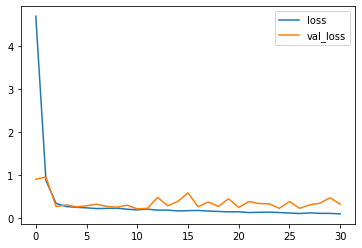

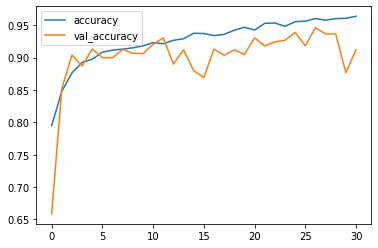

In [21]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

#### Nhận xét:
- Model đạt valid_accuracy tốt ~ 91.20%%
- Model dù đạt kết quả khá tốt nhưng tốn thời gian.

In [22]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

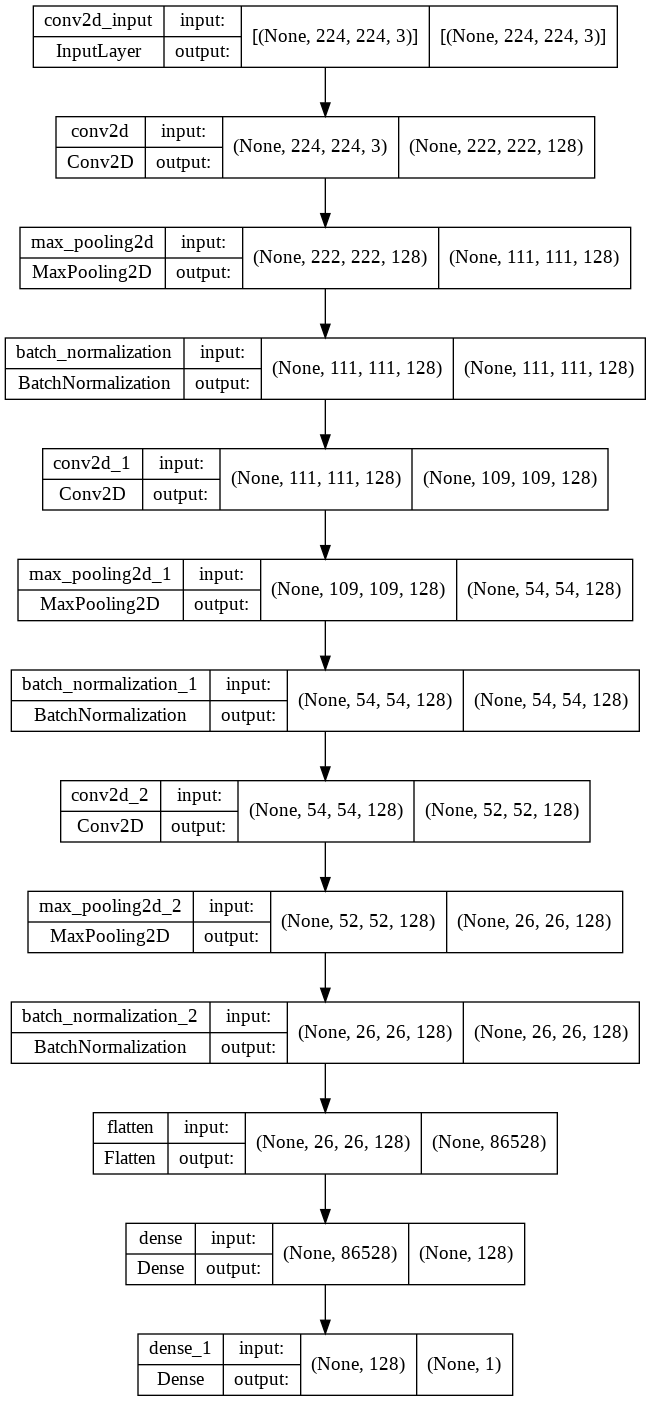

In [23]:
plot_model(classifier, to_file='CNN/CNN_224.png', show_shapes=True)
Image(filename='CNN/CNN_224.png')

In [24]:
#save model
from tensorflow.keras.models import load_model
classifier.save('CNN/CNN_224.h5')
print('save!!')

save!!


In [25]:
classifier = load_model('CNN/CNN_224.h5')

In [71]:
import numpy as np 
from tensorflow.keras.preprocessing import image

In [72]:
def result(test_image):
    test_image = image.img_to_array(test_image)
    #print(test_image.shape)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    #print(test_image.shape)

    result = classifier.predict(test_image)
    #print(result)
    
    # 0: fish, 1: plastic waste; sigmoid có ngưỡng 0.5
    if result[0][0]>=0.5:
        prediction = 'PlasticWaste'
    else:
        prediction = 'Fish'
    return prediction

In [73]:
classifier.load_weights('CNN/model_checkpoint_CNN_224.h5')
test_evaluation= classifier.evaluate(test_set)
print('Test Accuracy:', round(test_evaluation[1], 4), 
        '; Test loss:', round(test_evaluation[0], 4))

52/52 [==============================] - 12s 227ms/step - loss: 0.2076 - accuracy: 0.9206
Test Accuracy: 0.9206 ; Test loss: 0.2076


In [74]:
import os 
predict_path= r'/content/gdrive/My Drive/MDS0_K278_NguyenYenQuynhDan/dataset/single_prediction/'
list_image= os.listdir(predict_path)

In [75]:
df= pd.DataFrame(columns=['name_file', 'truth', 'predict'])
name_file=[]
truth=[]
predict=[]

In [76]:
for i in range(len(list_image)):
    path= predict_path + list_image[i]
    test_img= image.load_img(path, target_size=[224, 224])
    name_file.append(list_image[i])
    truth.append(list_image[i].split('_')[0])
    predict.append(result(test_img))

df['name_file']= name_file
df['truth']= truth
df['predict']= predict
df.to_csv('CNN/prediction_CNN_224.csv')

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [78]:
confusion_matrix(df['truth'], df['predict'])

array([[49,  1],
       [13, 37]])

In [79]:
print(classification_report(df['truth'], df['predict']))

              precision    recall  f1-score   support

        Fish       0.79      0.98      0.87        50
PlasticWaste       0.97      0.74      0.84        50

    accuracy                           0.86       100
   macro avg       0.88      0.86      0.86       100
weighted avg       0.88      0.86      0.86       100

